# Project 2

## Customer Segmentation using RFM Analysis

Libraries to import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime

Import document

In [2]:
df = pd.read_csv('data.csv', encoding='latin-1')

Take a look

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Understand the size

In [4]:
rows,columns=df.shape
print(f'This data set contains {rows} rows and {columns} columns')

This data set contains 541909 rows and 8 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We will drop the duplicates

In [8]:
df.duplicated().sum()

5268

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

We will start to analyze column per column the values that we have, because we have notice outliers in the data

## Cleaning

### InvoiceNo

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' InvoiceNo responds to "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

In [12]:
a=df['InvoiceNo'].isnull().sum()
print(f'In the column InvoiceNo we have {a} null values')

In the column InvoiceNo we have 0 null values


We will like to know how many of those data are cancellation

In [13]:
cancellations = (df['InvoiceNo'].str.lower().str.startswith('c')).sum()
print(f"Number of cancellations: {cancellations}")

Number of cancellations: 9251


In [14]:
participation=(cancellations/rows)*100
print(f'The participation of the cancellations in the data is {participation:.2f}%')

The participation of the cancellations in the data is 1.71%


### StockCode	

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' StockCode responds to "Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product."

In [15]:
b=df['InvoiceNo'].isnull().sum()
print(f'In the column InvoiceNo we have {b} null values')

In the column InvoiceNo we have 0 null values


We will agroup codes by description to know what codes do not have any description, because if we do not know about their description we will not get the information required from it. 

In [16]:
code_description = df.groupby('StockCode')['Description'].first().to_dict()

In [17]:
code_description

{'10002': 'INFLATABLE POLITICAL GLOBE ',
 '10080': 'GROOVY CACTUS INFLATABLE',
 '10120': 'DOGGY RUBBER',
 '10123C': 'HEARTS WRAPPING TAPE ',
 '10123G': None,
 '10124A': 'SPOTS ON RED BOOKCOVER TAPE',
 '10124G': 'ARMY CAMO BOOKCOVER TAPE',
 '10125': 'MINI FUNKY DESIGN TAPES',
 '10133': 'COLOURING PENCILS BROWN TUBE',
 '10134': None,
 '10135': 'COLOURING PENCILS BROWN TUBE',
 '11001': 'ASSTD DESIGN RACING CAR PEN',
 '15030': 'FAN BLACK FRAME ',
 '15034': 'PAPER POCKET TRAVELING FAN ',
 '15036': 'ASSORTED COLOURS SILK FAN',
 '15039': 'SANDALWOOD FAN',
 '15044A': 'PINK PAPER PARASOL ',
 '15044B': 'BLUE PAPER PARASOL ',
 '15044C': 'PURPLE PAPER PARASOL',
 '15044D': 'RED PAPER PARASOL',
 '15056BL': 'EDWARDIAN PARASOL BLACK',
 '15056N': 'EDWARDIAN PARASOL NATURAL',
 '15056P': 'EDWARDIAN PARASOL PINK',
 '15056bl': 'EDWARDIAN PARASOL BLACK',
 '15056n': 'EDWARDIAN PARASOL NATURAL',
 '15056p': 'EDWARDIAN PARASOL PINK',
 '15058A': 'BLUE POLKADOT GARDEN PARASOL',
 '15058B': 'PINK POLKADOT GARDEN PA

In [18]:
code_not_description = [stockcode for stockcode, description in code_description.items() if description is None]
code_not_description[:5]

['10123G', '10134', '16053', '17011A', '20689']

In [19]:
len(code_not_description)

112

In [20]:
df_none = df[df['StockCode'].isin(code_not_description)]
print(df_none)

       InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
1970      536545     21134         NaN         1   12/1/2010 14:32        0.0   
1987      536549    85226A         NaN         1   12/1/2010 14:34        0.0   
1988      536550     85044         NaN         1   12/1/2010 14:34        0.0   
2024      536552     20950         NaN         1   12/1/2010 14:34        0.0   
2026      536554     84670         NaN        23   12/1/2010 14:35        0.0   
...          ...       ...         ...       ...               ...        ...   
280754    561498     21610         NaN       -14   7/27/2011 14:10        0.0   
281615    561555    37477B         NaN       -11   7/28/2011 10:21        0.0   
281616    561557    37477C         NaN       -31   7/28/2011 10:21        0.0   
346849    567207    35592T         NaN         4   9/19/2011 11:01        0.0   
497301    578360    84971L         NaN         2  11/24/2011 10:36        0.0   

        CustomerID         

Participation of the none codes in the data

In [21]:
p2=(len(code_not_description)/rows)*100
print(f'The participation of the none descriptions in the data is {p2:.2f}%')

The participation of the none descriptions in the data is 0.02%


We will drop those since they are not significantly important 

In [22]:
df = df[~df['StockCode'].isin(code_not_description)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Description	

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' Description responds to " Product (item) name. Nominal."

We know that there are descriptions with none values so we will assign the values of the respective code

In [23]:
p3=df['Description'].isnull().sum()
p3

1342

In [24]:
p3=(p3/rows)*100
print(f'The participation of none descriptions in the data is {p3:.2f}%')

The participation of none descriptions in the data is 0.25%


In [25]:
df['Description'] = df['Description'].fillna(df['StockCode'].map(code_description))
df['Description'].isnull().sum()

0

###  Quantity	

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' Quantity responds to "the quantities of each product (item) per transaction. Numeric."

In [26]:
rows,columns=df.shape
print(f'This data set contains {rows} rows and {columns} columns')

This data set contains 536529 rows and 8 columns


In [27]:
df['Quantity'].describe()

count    536529.000000
mean          9.623748
std         219.152755
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Is clear that we have outliers so we will check those in a boxplot

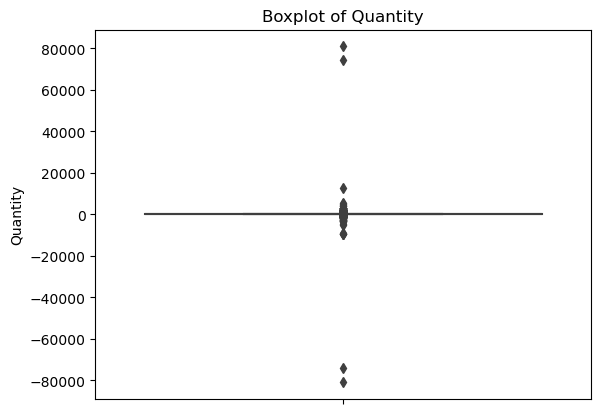

In [28]:
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

We need to stablish the quantiles to eliminate data that is not accurate 

In [29]:
q1=df['Quantity'].quantile(0.25)
q3=df['Quantity'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [30]:
print("quantile 1:",q1)
print("quantile 3:",q3)
print("Lower fence:",lower_fence)
print("Higher fence:",higher_fence)

quantile 1: 1.0
quantile 3: 10.0
Lower fence: -12.5
Higher fence: 23.5


We count the number of data enclosed in those limits

In [31]:
outliers = (df['Quantity'] < lower_fence) | (df['Quantity'] > higher_fence)
outliers.sum()

58476

In [32]:
print("Number of outliers in 'Quantity':", outliers.sum())

Number of outliers in 'Quantity': 58476


In [33]:
p4=(outliers.sum()/rows)*100
print(f'The participation of the outliers in the data is {p4:.2f}%')

The participation of the outliers in the data is 10.90%


Because this % is low, we decided to eliminate those

In [34]:
df=df[(df['Quantity'] >= lower_fence) & (df['Quantity'] <=higher_fence)]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478053 entries, 0 to 478052
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    478053 non-null  object 
 1   StockCode    478053 non-null  object 
 2   Description  478053 non-null  object 
 3   Quantity     478053 non-null  int64  
 4   InvoiceDate  478053 non-null  object 
 5   UnitPrice    478053 non-null  float64
 6   CustomerID   346189 non-null  float64
 7   Country      478053 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 29.2+ MB


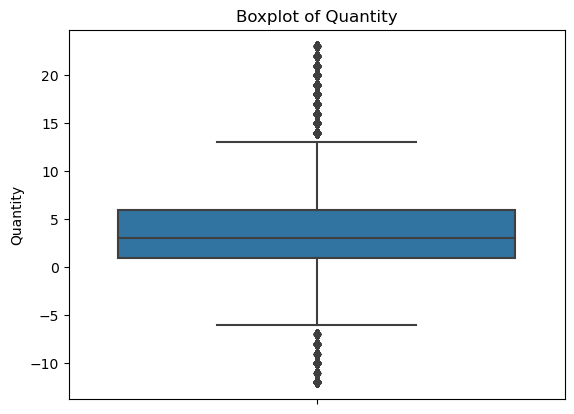

In [35]:
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

With the last boxplot is clear that our data is more uniform and the outliers are not to far from our median as before

###  InvoiceDate

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' InvoiceDate responds to "the day and time when each transaction was generated."

In [36]:
df['InvoiceDate'].isnull().sum()

0

In [37]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 478053 entries, 0 to 478052
Series name: InvoiceDate
Non-Null Count   Dtype 
--------------   ----- 
478053 non-null  object
dtypes: object(1)
memory usage: 3.6+ MB


In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 478053 entries, 0 to 478052
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
478053 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.6 MB


In [40]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom


Since it does not have any null value and is in the correct format we will pass to the next column

###  UnitPrice

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' UnitPrice responds to "Product price per unit in sterling."

In [41]:
rows,columns=df.shape
print(f'This data set contains {rows} rows and {columns} columns')

This data set contains 478053 rows and 8 columns


In [42]:
df['UnitPrice'].isnull().sum()

0

In [43]:
df['UnitPrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 478053 entries, 0 to 478052
Series name: UnitPrice
Non-Null Count   Dtype  
--------------   -----  
478053 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


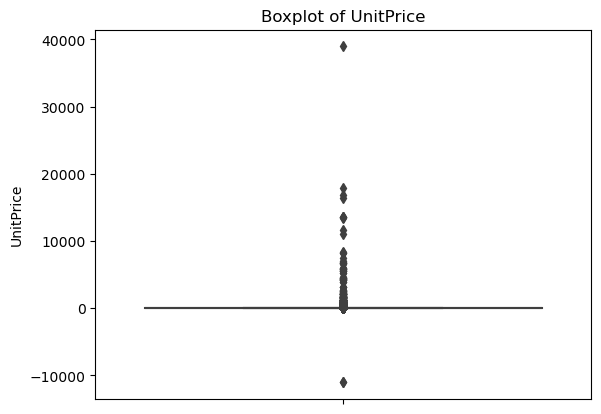

In [44]:
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

We need to stablish the quantiles to eliminate data that is not accurate 

In [45]:
q1=df['UnitPrice'].quantile(0.25)
q3=df['UnitPrice'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [46]:
print("quantile 1:",q1)
print("quantile 3:",q3)
print("Lower fence:",lower_fence)
print("Higher fence:",higher_fence)

quantile 1: 1.25
quantile 3: 4.21
Lower fence: -3.1899999999999995
Higher fence: 8.649999999999999


We count the number of data enclosed in those limits

In [47]:
outliers = (df['UnitPrice'] < lower_fence) | (df['UnitPrice'] > higher_fence)
outliers.sum()

32348

In [48]:
print("Number of outliers in 'Quantity':", outliers.sum())

Number of outliers in 'Quantity': 32348


In [49]:
p5=(outliers.sum()/rows)*100
print(f'The participation of the outliers in the data is {p5:.2f}%')

The participation of the outliers in the data is 6.77%


Because this % is low, we decided to eliminate those

In [50]:
df=df[(df['UnitPrice'] >= lower_fence) & (df['UnitPrice'] <=higher_fence)]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445705 entries, 0 to 445704
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    445705 non-null  object        
 1   StockCode    445705 non-null  object        
 2   Description  445705 non-null  object        
 3   Quantity     445705 non-null  int64         
 4   InvoiceDate  445705 non-null  datetime64[ns]
 5   UnitPrice    445705 non-null  float64       
 6   CustomerID   328149 non-null  float64       
 7   Country      445705 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.2+ MB


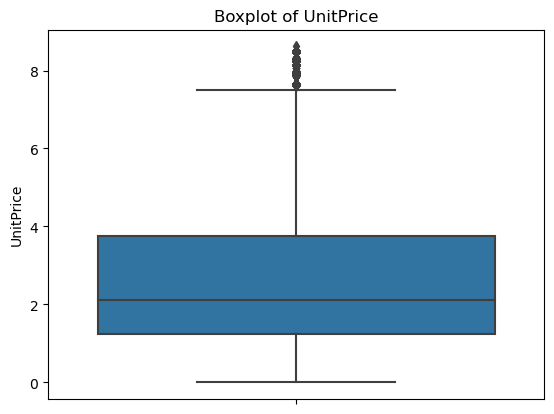

In [51]:
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

With the last boxplot is clear that our data is more uniform and the outliers are not to far from our median as before

###  CustomerID

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' CustomerID responds to "a 5-digit integral number uniquely assigned to each customer."

In [52]:
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 445705 entries, 0 to 445704
Series name: CustomerID
Non-Null Count   Dtype  
--------------   -----  
328149 non-null  float64
dtypes: float64(1)
memory usage: 3.4 MB


In [53]:
rows,columns=df.shape
print(f'This data set contains {rows} rows and {columns} columns')

This data set contains 445705 rows and 8 columns


In [54]:
d=df['CustomerID'].isnull().sum()
print(f'In the column CustomerID we have {d} null values')

In the column CustomerID we have 117556 null values


In [55]:
d=(d/rows)*100
print(f'The participation of the none data in CustomerID is {d:.2f}%')

The participation of the none data in CustomerID is 26.38%


Since the % is importan we can not drop those data, so we will fill those with 10000 that will correspond to unknown

In [56]:
df['CustomerID'] = df['CustomerID'].fillna(10000)

In [57]:
d=df['CustomerID'].isnull().sum()
print(f'In the column CustomerID we have {d} null values')

In the column CustomerID we have 0 null values


###  Country

According to the website 'https://archive.ics.uci.edu/dataset/352/online+retail' Country responds to "the name of the country where each customer resides."

In [58]:
df['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 445705 entries, 0 to 445704
Series name: Country
Non-Null Count   Dtype 
--------------   ----- 
445705 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [59]:
d=df['Country'].isnull().sum()
print(f'In the column Country we have {d} null values')

In the column Country we have 0 null values


## RFM Calculation:

We will start calculating the recency, frequency and monetary values required for 

In [60]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
recency = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency.columns = ['CustomerID', 'InvoiceDate'] 
date = recency['InvoiceDate'].max()
recency['Recency'] = recency['InvoiceDate'].apply(lambda x: (date - x).days)
recency.head()

,CustomerID,InvoiceDate,Recency
0,10000.0,2011-12-09 10:26:00,0
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-04-05 10:47:00,248
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [62]:
frequency = df.groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,10000.0,117556
1,12347.0,141
2,12348.0,1
3,12349.0,61
4,12350.0,15


In [63]:
df['Total'] = df['UnitPrice']*df['Quantity']
monetary = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,10000.0,857531.44
1,12347.0,2866.77
2,12348.0,17.00
3,12349.0,1155.75
4,12350.0,274.00


In [64]:
rf = recency.merge(frequency, on='CustomerID')
rfm = rf.merge(monetary, on='CustomerID').drop(columns='InvoiceDate')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,10000.0,0,117556,857531.44
1,12347.0,1,141,2866.77
2,12348.0,248,1,17.00
3,12349.0,18,61,1155.75
4,12350.0,309,15,274.00


Since we want to calculate this data to identify real clients is important to drop the CustomerID 10000

In [65]:
rfm=rfm.iloc[1:]

In [66]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
1,12347.0,1,141,2866.77
2,12348.0,248,1,17.00
3,12349.0,18,61,1155.75
4,12350.0,309,15,274.00
5,12352.0,35,78,1112.11


In [67]:
rfm = rfm.reset_index(drop=True)

In [68]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,141,2866.77
1,12348.0,248,1,17.00
2,12349.0,18,61,1155.75
3,12350.0,309,15,274.00
4,12352.0,35,78,1112.11


We will use qcut from pandas to calculate quartiles in each category and assign scores

- Recency_Score: 1 Least Recent, 5 Most Recent
- Frequency_Score: 1 Least Frequent, 5 Most Frequent
- Monetary_Score: 1 Least Spent, 5 Most Spent

In [69]:
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2,1]).astype(int)
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=[1, 2, 3, 4,5]).astype(int)
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4,5]).astype(int)
rfm['RFM_Score'] = rfm['Recency_Score'] * 100 + rfm['Frequency_Score'] * 10 + rfm['Monetary_Score']

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12347.0,1,141,2866.77,5,5,5,555
1,12348.0,248,1,17.00,1,1,1,111
2,12349.0,18,61,1155.75,4,4,4,444
3,12350.0,309,15,274.00,1,2,2,122
4,12352.0,35,78,1112.11,3,4,4,344


In [70]:
rfm.to_csv('rfm_data.csv', index=False)

We want to verify that our data is correct and we can certify it since the lowest values is 111 and the maximum is 444

In [71]:
rfm['RFM_Score'].describe()

count    4207.000000
mean      334.000713
std       150.128020
min       111.000000
25%       212.000000
50%       333.000000
75%       454.000000
max       555.000000
Name: RFM_Score, dtype: float64

However we need to clear our data in a way that it allows us to perform a good cluster, so we will analyze if there is any outlier and we will manage it.

In [72]:
rfm['Frequency'].describe()

count    4207.000000
mean       78.000713
std       202.440165
min         1.000000
25%        14.000000
50%        34.000000
75%        84.000000
max      7409.000000
Name: Frequency, dtype: float64

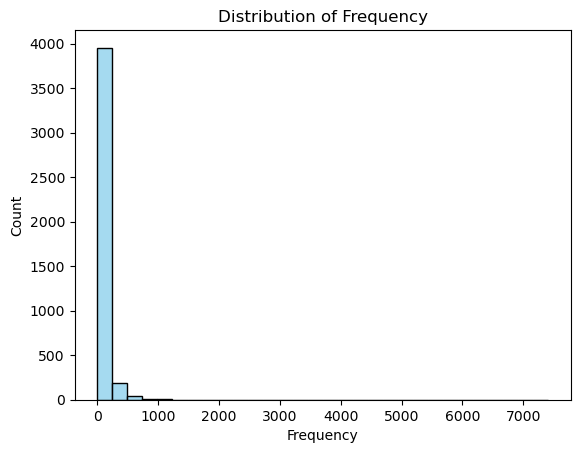

In [73]:
sns.histplot(rfm['Frequency'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()


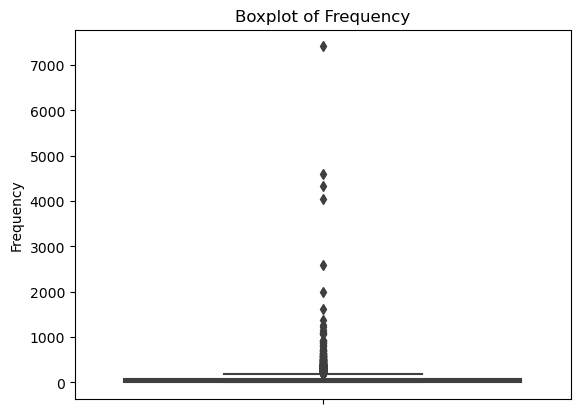

In [74]:
sns.boxplot(y=rfm['Frequency'])
plt.title('Boxplot of Frequency')
plt.show()

Is clear that we have outliers, since our clustering method is sensible to this data, we won't consider those data to perform our clustering.

In [75]:
q1=rfm['Frequency'].quantile(0.25)
q3=rfm['Frequency'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [76]:
print("quantile 1:",q1)
print("quantile 3:",q3)
print("Lower fence:",lower_fence)
print("Higher fence:",higher_fence)

quantile 1: 14.0
quantile 3: 84.0
Lower fence: -91.0
Higher fence: 189.0


In [77]:
outliers = (rfm['Frequency'] < lower_fence) | (rfm['Frequency'] > higher_fence)

In [78]:
print("Number of outliers in 'Frequency':", outliers.sum())

Number of outliers in 'Frequency': 379


In [79]:
print(f'The participation of Frequency outliers in the data is {(outliers.sum()/len(rfm))*100:.2f}%')

The participation of Frequency outliers in the data is 9.01%


In [80]:
rfm=rfm[(rfm['Frequency'] >= 0) & (rfm['Frequency']<=higher_fence)]
rfm= rfm.reset_index(drop=True)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3828 non-null   float64
 1   Recency          3828 non-null   int64  
 2   Frequency        3828 non-null   int64  
 3   Monetary         3828 non-null   float64
 4   Recency_Score    3828 non-null   int32  
 5   Frequency_Score  3828 non-null   int32  
 6   Monetary_Score   3828 non-null   int32  
 7   RFM_Score        3828 non-null   int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 179.6 KB


In [81]:
rfm['Frequency'].describe()

count    3828.000000
mean       44.824190
std        42.909025
min         1.000000
25%        12.000000
50%        29.000000
75%        64.000000
max       189.000000
Name: Frequency, dtype: float64

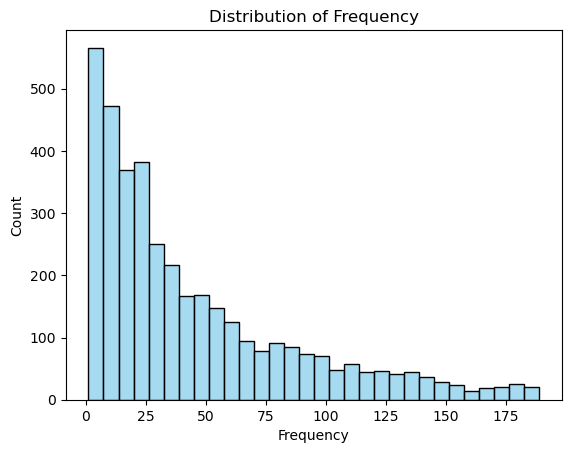

In [82]:
sns.histplot(rfm['Frequency'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

Now this is well distribuited and we will analyze the next category

In [83]:
rfm['Monetary'].describe()

count    3828.000000
mean      614.835513
std       689.372416
min      -274.640000
25%       170.745000
50%       368.365000
75%       789.567500
max      6964.900000
Name: Monetary, dtype: float64

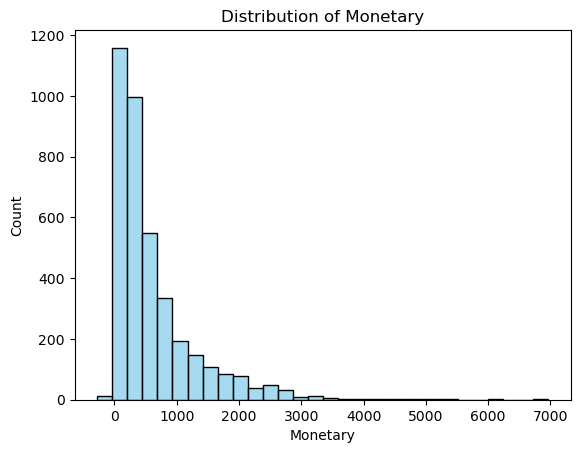

In [84]:
sns.histplot(rfm['Monetary'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.show()

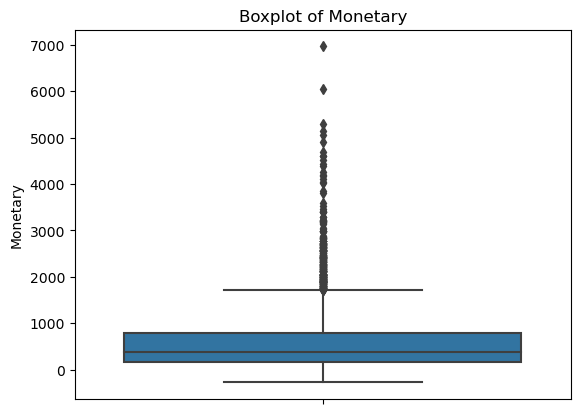

In [85]:
sns.boxplot(y=rfm['Monetary'])
plt.title('Boxplot of Monetary')
plt.show()

Since we have returns and the monetary values are negative we will drop those values for the clustering because that will affect the results

In [86]:
q1=rfm['Monetary'].quantile(0.25)
q3=rfm['Monetary'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [87]:
print("quantile 1:",q1)
print("quantile 3:",q3)
print("Lower fence:",lower_fence)
print("Higher fence:",higher_fence)

quantile 1: 170.745
quantile 3: 789.5675000000001
Lower fence: -757.4887500000001
Higher fence: 1717.8012500000002


In [88]:
outliers = (rfm['Monetary'] < 0) | (rfm['Monetary'] > higher_fence)

In [89]:
print("Number of outliers in 'Monetary':", outliers.sum())

Number of outliers in 'Monetary': 348


In [90]:
print(f'The participation of Monetary outliers in the data is {(outliers.sum()/len(rfm))*100:.2f}%')

The participation of Monetary outliers in the data is 9.09%


In [91]:
rfm=rfm[(rfm['Monetary'] >= 0) & (rfm['Monetary']<=higher_fence)]
rfm= rfm.reset_index(drop=True)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3480 non-null   float64
 1   Recency          3480 non-null   int64  
 2   Frequency        3480 non-null   int64  
 3   Monetary         3480 non-null   float64
 4   Recency_Score    3480 non-null   int32  
 5   Frequency_Score  3480 non-null   int32  
 6   Monetary_Score   3480 non-null   int32  
 7   RFM_Score        3480 non-null   int32  
dtypes: float64(2), int32(4), int64(2)
memory usage: 163.3 KB


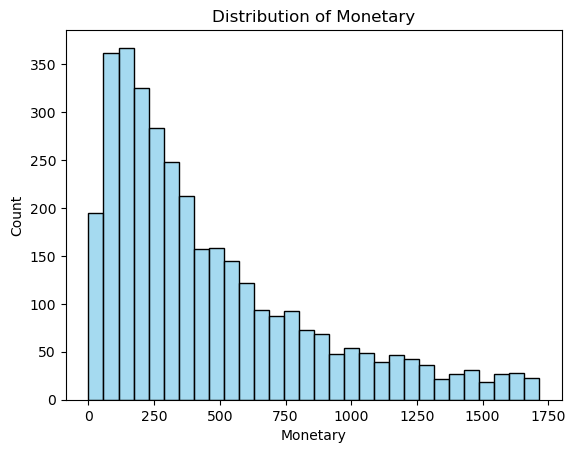

In [92]:
sns.histplot(rfm['Monetary'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.show()

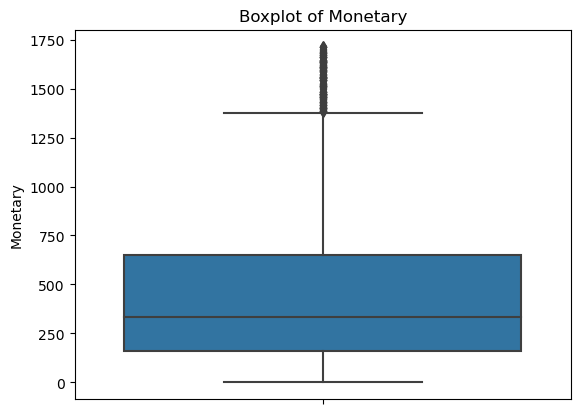

In [93]:
sns.boxplot(y=rfm['Monetary'])
plt.title('Boxplot of Monetary')
plt.show()

Now we will analyze Recency for outiliers

In [94]:
rfm['Recency'].describe()

count    3480.000000
mean      103.404310
std       102.840646
min         0.000000
25%        22.000000
50%        60.000000
75%       169.000000
max       373.000000
Name: Recency, dtype: float64

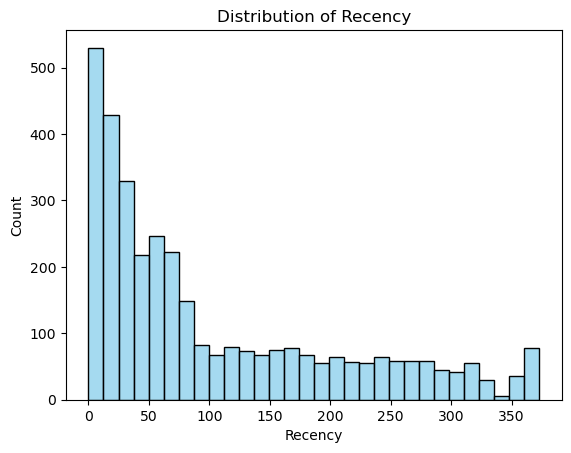

In [95]:
sns.histplot(rfm['Recency'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

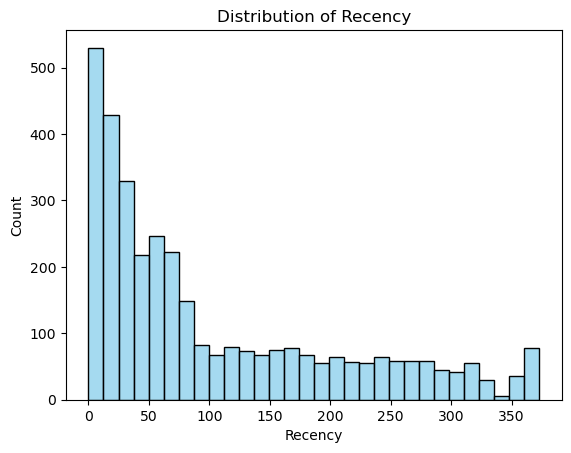

In [96]:
sns.histplot(rfm['Recency'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

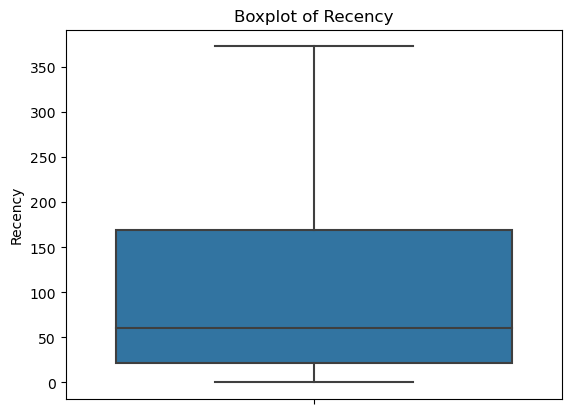

In [97]:
sns.boxplot(y=rfm['Recency'])
plt.title('Boxplot of Recency')
plt.show()

This values are well distribuited so we will not change or manage it.

## Customer Segmentation:

We will star using just our columns 'Recency_Score', 'Frequency_Score', 'Monetary_Score'

In [98]:
X = rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']]

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

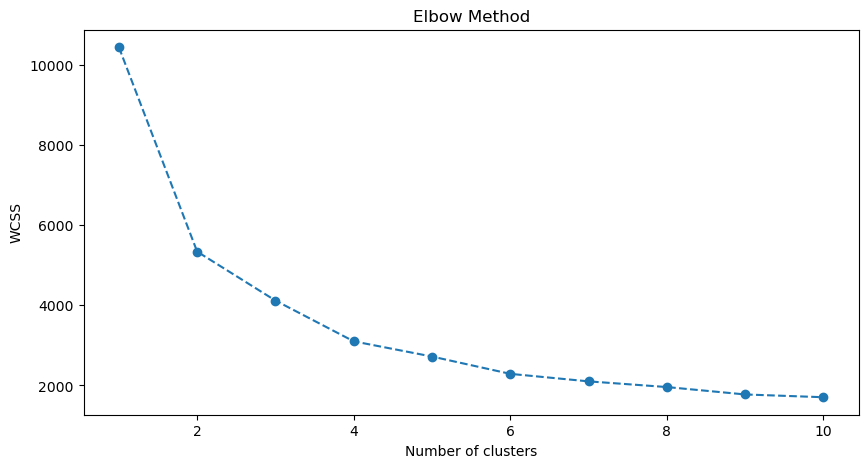

In [101]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We will use KMeans method for our clustering. We will start with 4 and we will perform it with 5 and 6 too.

- 4

In [102]:
optimal_clusters = 4  

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
rfm['Cluster'] = kmeans.labels_

C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
clusters_4=(rfm['Cluster'].value_counts())

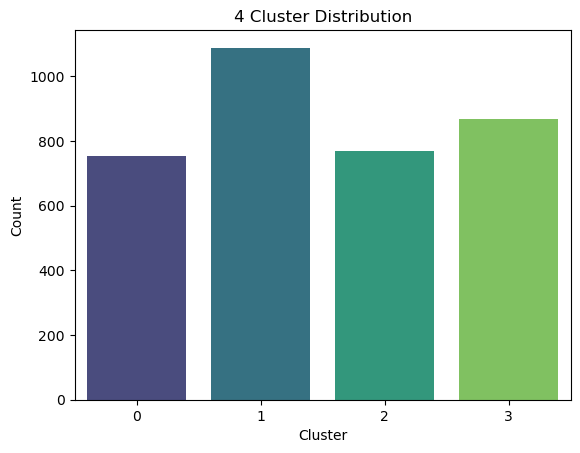

In [104]:
sns.barplot(x=clusters_4.index, y=clusters_4.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('4 Cluster Distribution')
plt.show()

- 5

In [105]:
optimal_clusters = 5  

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
rfm['Cluster'] = kmeans.labels_

C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [106]:
clusters_5=(rfm['Cluster'].value_counts())

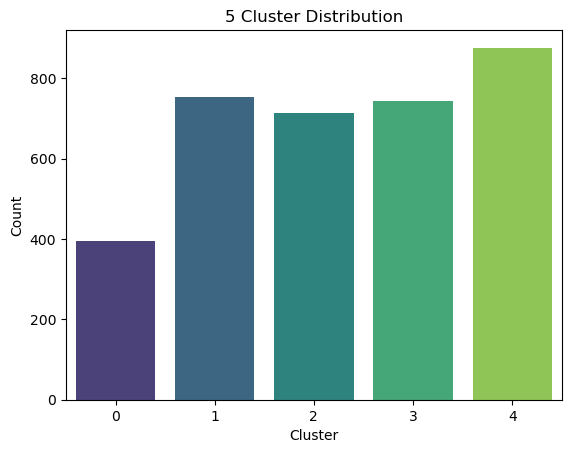

In [107]:
sns.barplot(x=clusters_5.index, y=clusters_5.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('5 Cluster Distribution')
plt.show()

- 6

In [108]:
optimal_clusters = 6 

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
rfm['Cluster'] = kmeans.labels_

C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
clusters_6=(rfm['Cluster'].value_counts())

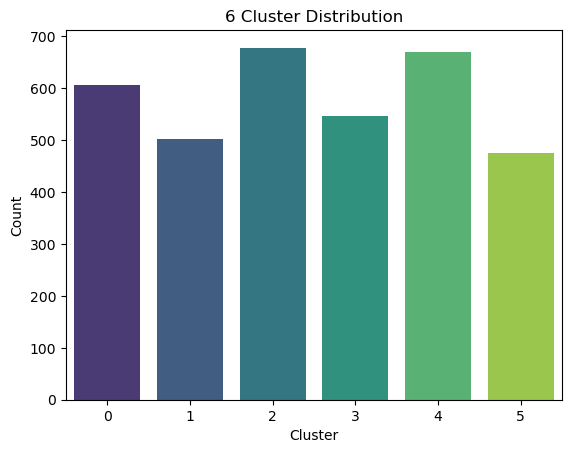

In [110]:
sns.barplot(x=clusters_6.index, y=clusters_6.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('6 Cluster Distribution')
plt.show()

After checking the distribution of values we consider that the best cluster would be 6.

In [111]:
optimal_clusters = 6  

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
rfm['Cluster'] = kmeans.labels_

C:\Users\Surface\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [112]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster
0,12348.0,248,1,17.00,1,1,1,111,0
1,12349.0,18,61,1155.75,4,4,4,444,1
2,12350.0,309,15,274.00,1,2,2,122,4
3,12352.0,35,78,1112.11,3,4,4,344,5
4,12353.0,203,2,29.30,1,1,1,111,0


We want to check that the values assigned are between 0 and 5

In [113]:
rfm['Cluster'].describe()

count    3480.000000
mean        2.459483
std         1.670319
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Cluster, dtype: float64

We want to visualize our clusters based on Recency and Frequency

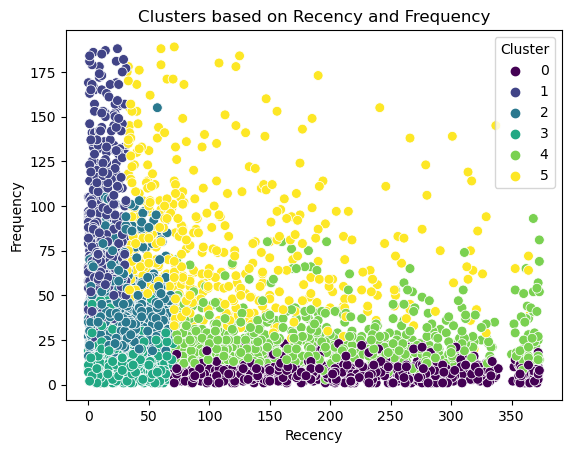

In [114]:
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis', s=50)
plt.title('Clusters based on Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

Even though some values are overlaped, is clear that we have 6 groups of data.

Now we will check our clustering but for the Frequency and Monetary

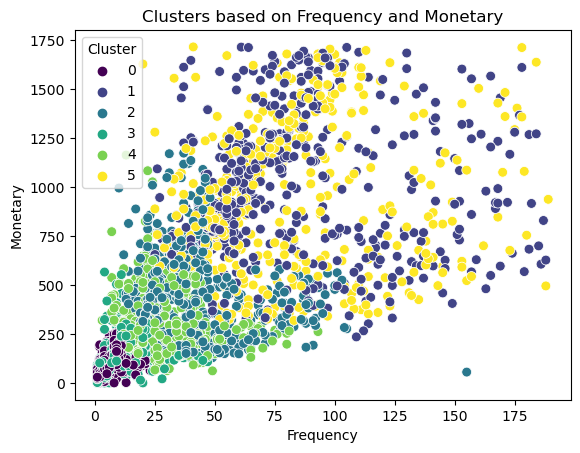

In [115]:
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis', s=50)
plt.title('Clusters based on Frequency and Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

This cluster is not as clear as the other ones, but we can stablish some layer from the point 0.

Now we will check our clustering but for the Recency and Monetary

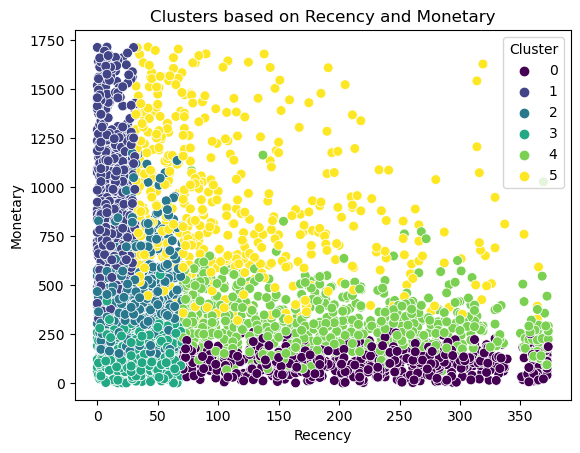

In [116]:
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis', s=50)
plt.title('Clusters based on Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

This graph shows us that we have gotten our 6 clusters and appears to be well distributed.

## Segment Profiling:

We will create our segmentation based in different studies. 
- https://www.everydaymarketing.co/business-and-marketing-case-study/data/rfm-analysis-fo-customer-segmentation-from-behavior-transaction-data/ 
- https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
- https://thecleverprogrammer.com/2023/06/12/rfm-analysis-using-python/
- https://clevertap.com/blog/rfm-analysis/

In [117]:
def assign_segment(row):
    if row['Recency_Score'] == 5 and row['Frequency_Score'] == 5 and row['Monetary_Score'] == 5:
        return 'Champions'
    elif row['Recency_Score'] >= 4 and row['Frequency_Score'] >= 4 and row['Monetary_Score'] >= 4:
        return 'Loyal Customers'
    elif row['Recency_Score'] >= 3 and row['Frequency_Score'] >= 3 and row['Monetary_Score'] >= 3:
        return 'Potential Loyalist'
    elif row['Recency_Score'] >= 4:
        return 'Recent Customers'
    elif row['Recency_Score'] >= 3 and row['Monetary_Score'] >= 2:
        return 'Promising'
    elif row['Recency_Score'] <= 3 and row['Frequency_Score'] <= 3 and row['Monetary_Score'] <= 3:
        return 'Customers Needing Attention'
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] <= 2 and row['Monetary_Score'] <= 2:
        return 'About To Sleep'
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] >= 4 and row['Monetary_Score'] >= 4:
        return 'Can’t Lose Them'
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] >= 3 and row['Monetary_Score'] >= 3:
        return 'At Risk'
    elif row['Recency_Score'] <= 1 and row['Frequency_Score'] <= 1 and row['Monetary_Score'] <= 1:
        return 'Hibernating'
    else:
        return 'Lost'

In [118]:
rfm['Segment'] = rfm.apply(assign_segment, axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster,Segment
0,12348.0,248,1,17.00,1,1,1,111,0,Customers Needing Attention
1,12349.0,18,61,1155.75,4,4,4,444,1,Loyal Customers
2,12350.0,309,15,274.00,1,2,2,122,4,Customers Needing Attention
3,12352.0,35,78,1112.11,3,4,4,344,5,Potential Loyalist
4,12353.0,203,2,29.30,1,1,1,111,0,Customers Needing Attention


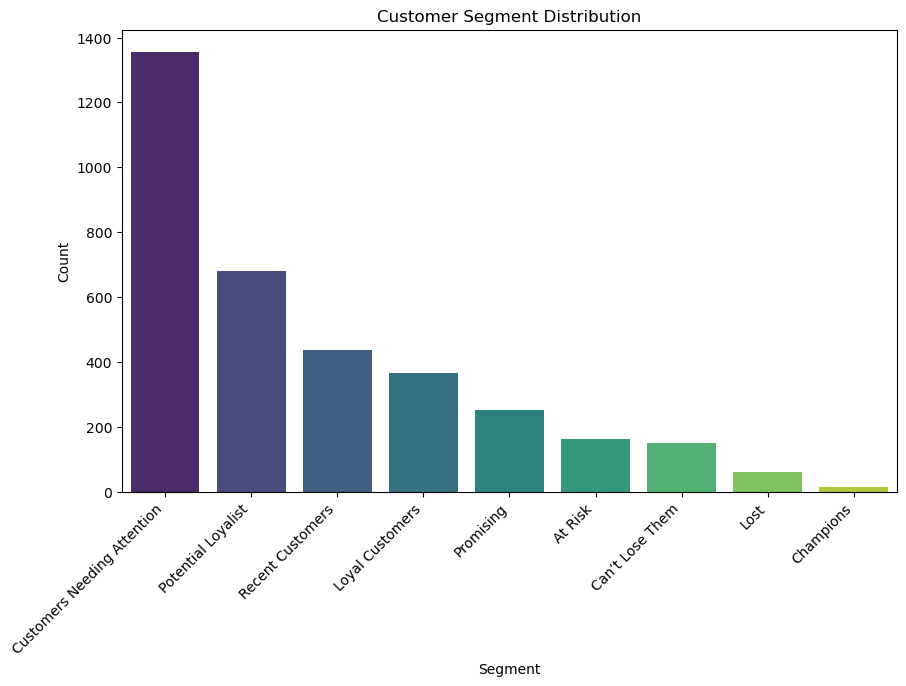

In [119]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()


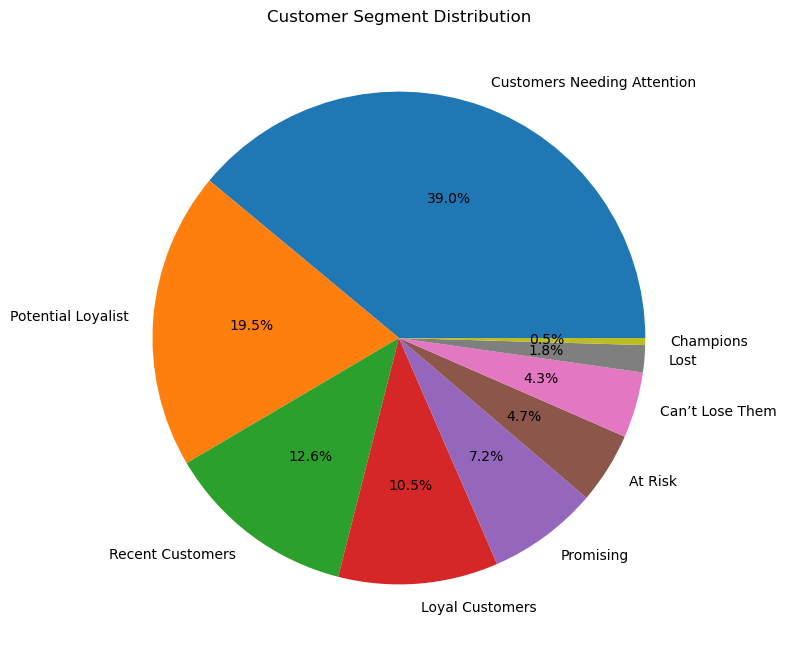

In [163]:
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segment Distribution')
plt.show()

In [240]:
segment_counts

Customers Needing Attention    1356
Potential Loyalist              679
Recent Customers                437
Loyal Customers                 365
Promising                       252
At Risk                         163
Can’t Lose Them                 150
Lost                             62
Champions                        16
Name: Segment, dtype: int64

## Marketing Recommendations:

Based on the RFM analysis and the identified customer segments, we recommend the next options for each segment:

- Customers Needing Attention (1356):

Make limited-time offers or promotions to re-engage them.
Recommend products based on their past purchases.
Send personalized emails to encourage repeat purchases.

- Potential Loyalist (679):

Offer a membership or loyalty program to incentivize loyalty.
Recommend complementary products based on their previous purchases.
Send targeted promotions to encourage repeat business.

- Recent Customers (437):

Provide onboarding support to help them get started.
Offer incentives for their next purchase.
Request feedback or reviews to build a relationship.

- Loyal Customers (365):

Upsell higher-value products or premium services.
Offer exclusive discounts or early access to new products.
Engage with them through loyalty programs and exclusive events.

- Promising (252):

Create brand awareness through targeted marketing.
Offer free trials or samples to encourage a higher commitment.
Showcase popular products and encourage exploration.

- At Risk (163):

Send personalized emails with special offers to win them back.
Provide incentives for reactivating their engagement.
Offer renewals or exclusive discounts to retain their business.

- Can't Lose Them (150):

Reach out with personalized communication to understand concerns.
Offer renewals, special discounts, or exclusive products.
Provide excellent customer support to retain their loyalty.

- Lost (62):

Launch a reach-out campaign to revive their interest.
Consider special promotions or discounts for a comeback.
If unresponsive, focus efforts on more engaged segments.

- Champions (16):

Reward them for their loyalty with exclusive perks.
Consider them as potential early adopters for new products.
Encourage them to become brand ambassadors through referral programs.

# Data Overview

In [166]:
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()

# Display the time period covered by the dataset
print(f'Time period covered by the dataset: {start_date} to {end_date}')

Time period covered by the dataset: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


## Customer Analysis:

In [121]:
unique = df['CustomerID'].nunique()
print(f'Number of unique customers: {unique}')

Number of unique customers: 4208


Since we have all those customers and we want to see the distribution in a proper way we will select the 20 most frequent customers. Is clear that we will have as the most frequent the customer 10000 but we will not count it since it is not a specific customer.

In [122]:
orders_per_customer = df.groupby('CustomerID')['Description'].count()

In [123]:
orders_per_customer = orders_per_customer.sort_values(ascending=False)
top_20 = orders_per_customer.iloc[1:21]

In [124]:
orders_per_customer.head(20)

CustomerID
10000.0    117556
17841.0      7409
14096.0      4593
14911.0      4322
12748.0      4047
14606.0      2593
15311.0      1999
13263.0      1612
15039.0      1376
13089.0      1262
18118.0      1213
14159.0      1161
15005.0      1110
16033.0      1082
14796.0      1065
14056.0      1060
14769.0       936
15719.0       923
16549.0       917
14456.0       913
Name: Description, dtype: int64

In [125]:
top_20

CustomerID
17841.0    7409
14096.0    4593
14911.0    4322
12748.0    4047
14606.0    2593
15311.0    1999
13263.0    1612
15039.0    1376
13089.0    1262
18118.0    1213
14159.0    1161
15005.0    1110
16033.0    1082
14796.0    1065
14056.0    1060
14769.0     936
15719.0     923
16549.0     917
14456.0     913
15555.0     867
Name: Description, dtype: int64

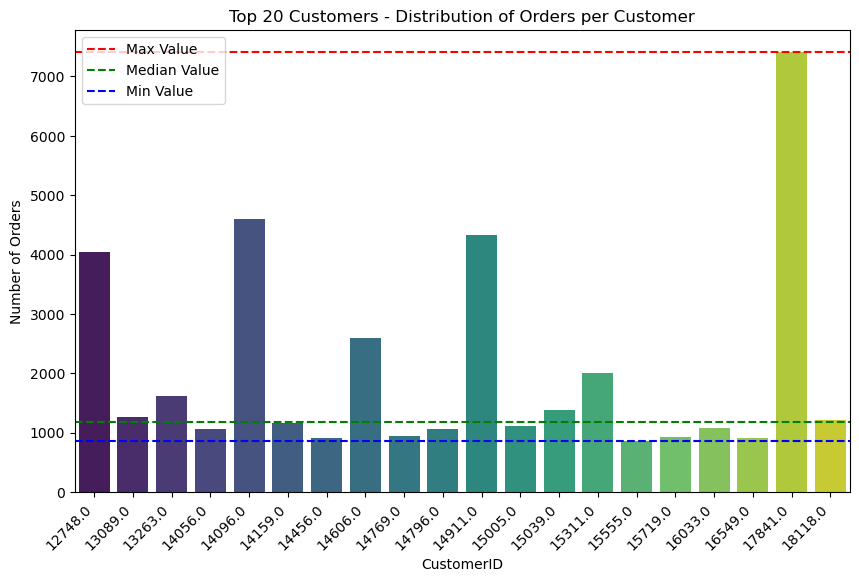

In [126]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')
plt.title('Top 20 Customers - Distribution of Orders per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=top_20.max(), color='red', linestyle='--', label='Max Value')
plt.axhline(y=top_20.median(), color='green', linestyle='--', label='Median Value')
plt.axhline(y=top_20.min(), color='blue', linestyle='--', label='Min Value')
plt.legend()
plt.show()

Our Top 5 customers are:

In [127]:
top_5 = orders_per_customer.iloc[1:6]

In [128]:
print(top_5)

CustomerID
17841.0    7409
14096.0    4593
14911.0    4322
12748.0    4047
14606.0    2593
Name: Description, dtype: int64


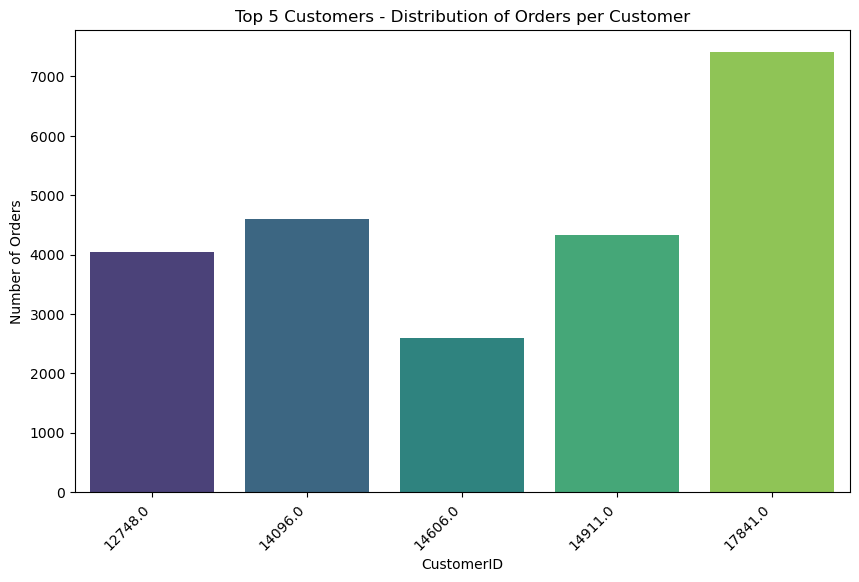

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette='viridis')
plt.title('Top 5 Customers - Distribution of Orders per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

## Product Analysis:

We have 3878 unique products

In [130]:
unique_products = df['Description'].nunique()
print(f'Number of unique Products: {unique_products}')

Number of unique Products: 3878


This are the top 10 most frequently purchased products

In [168]:
orders_per_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
top_10_products = orders_per_product.nlargest(10)

print('Top 10 Most Frequently Purchased Products:')
top_10_products

Top 10 Most Frequently Purchased Products:


Description
JUMBO BAG RED RETROSPOT               13930
ASSORTED COLOUR BIRD ORNAMENT         10915
WHITE HANGING HEART T-LIGHT HOLDER    10806
LUNCH BAG RED RETROSPOT               10374
LUNCH BAG  BLACK SKULL.                8103
LUNCH BAG CARS BLUE                    7838
JAM MAKING SET PRINTED                 7582
JUMBO BAG PINK POLKADOT                7400
LUNCH BAG APPLE DESIGN                 7358
LUNCH BAG SPACEBOY DESIGN              7206
Name: Quantity, dtype: int64

The average price of products in the dataset is:

In [170]:
average_price_products = df['UnitPrice'].mean()
print(f'Average Price of Products: ${average_price_products:.2f}')

Average Price of Products: $2.79


We do not have the production price of each product so the top 5 products with the highest profit margins are the products that made more money.

In [212]:
revenues=df.groupby('Description')['Total'].sum().sort_values(ascending=False)
revenues.head(5)

Description
PARTY BUNTING                         33965.58
WHITE HANGING HEART T-LIGHT HOLDER    33764.42
JUMBO BAG RED RETROSPOT               32054.02
JAM MAKING SET WITH JARS              22998.51
SPOTTY BUNTING                        22515.55
Name: Total, dtype: float64

In [213]:
product_name=revenues.index[0]
highest_revenue =revenues.iloc[0]
print(f"{product_name} generates the Highest Revenue: ${highest_revenue}")

PARTY BUNTING generates the Highest Revenue: $33965.58


In [214]:
revenues.describe()

count     3878.000000
mean      1230.064601
std       2521.686394
min       -107.940000
25%         65.340000
50%        352.970000
75%       1181.455000
max      33965.580000
Name: Total, dtype: float64

The total profit generated by the company during the dataset's time period is:

In [215]:
revenues.describe()
total_revenues=revenues.values.sum()
print(f'The total amount of revenue made was: ${total_revenues:.2f}')

The total amount of revenue made was: $4770190.52


## Time Analysis:

In [135]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

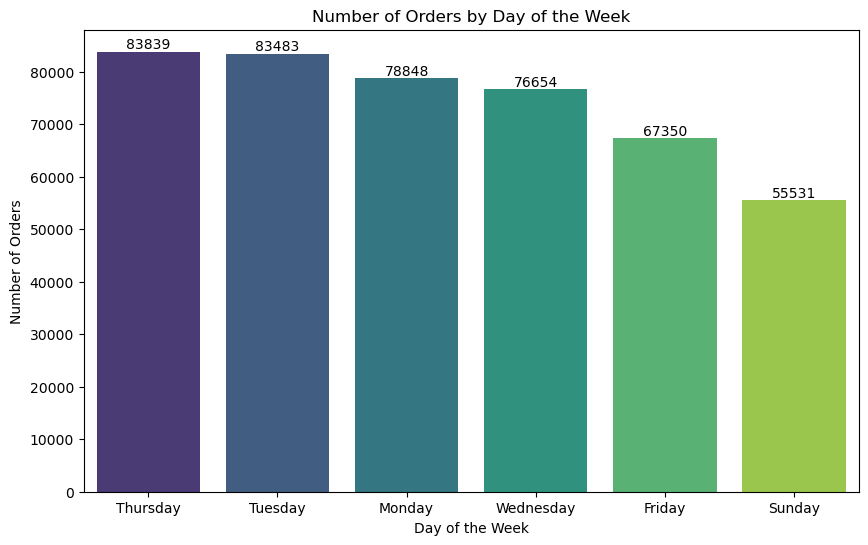

In [136]:
orders_by_day = df['DayOfWeek'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='viridis')
for index, value in enumerate(orders_by_day.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

In [137]:
orders_by_day 

Thursday     83839
Tuesday      83483
Monday       78848
Wednesday    76654
Friday       67350
Sunday       55531
Name: DayOfWeek, dtype: int64

In [138]:
day_name=orders_by_day.index[0]
highest_day =orders_by_day.iloc[0]
print(f"{day_name} day of the week when most orders are placed with {highest_day } orders")

Thursday day of the week when most orders are placed with 83839 orders


In [139]:
df['Hour'] = df['InvoiceDate'].dt.hour

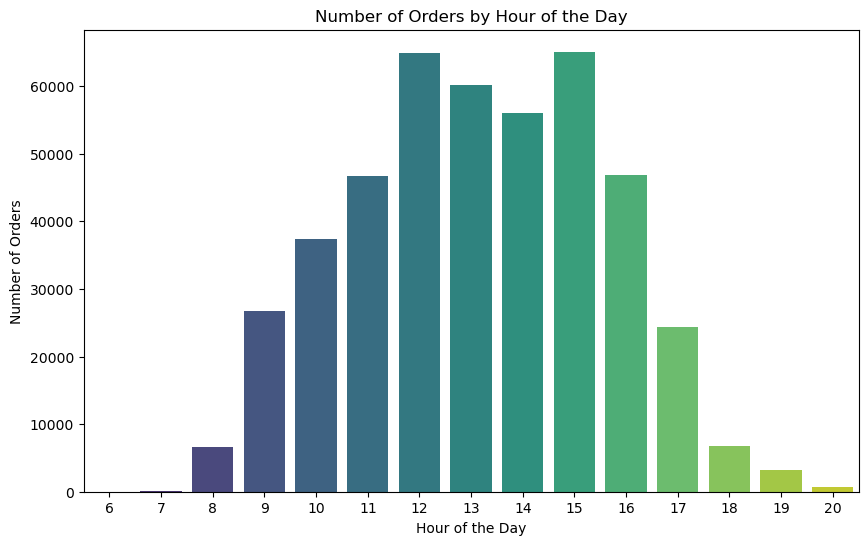

In [140]:
orders_by_hour = df['Hour'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette='viridis')

plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

In [141]:
orders_by_hour

15    65086
12    64941
13    60129
14    55977
16    46888
11    46746
10    37358
9     26801
17    24335
18     6821
8      6543
19     3168
20      719
7       163
6        30
Name: Hour, dtype: int64

In [142]:
hour_name=orders_by_hour.index[0]
highest_hour =orders_by_hour.iloc[0]
print(f"{hour_name}:00h is the hour when most orders are placed with {highest_hour } orders")

15:00h is the hour when most orders are placed with 65086 orders


Since we do not have the time when the order was delivered we can not certify or analyze the processing time.

In [143]:
df['Month_Name']=df['InvoiceDate'].dt.month_name()

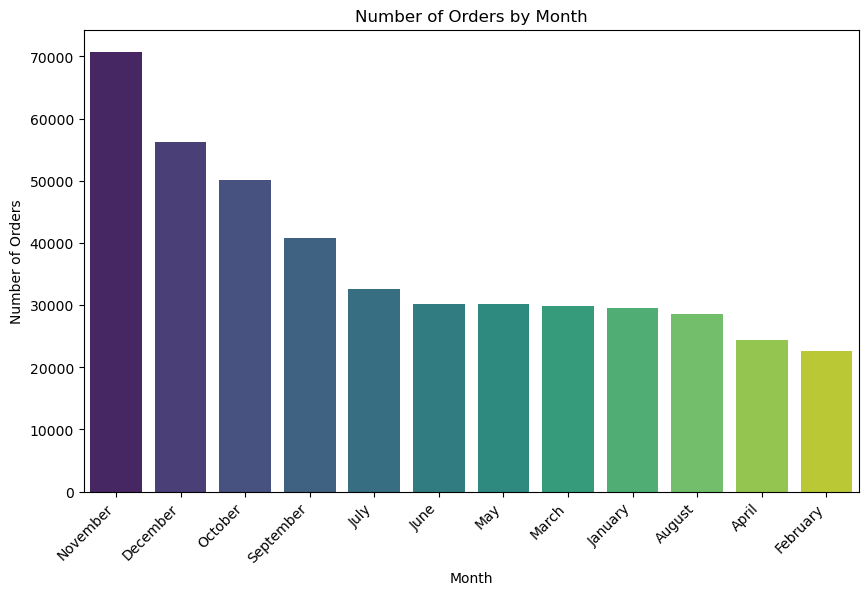

In [144]:
orders_by_month = df['Month_Name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_month.index, y=orders_by_month.values, palette='viridis')
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

In [145]:
orders_by_month 

November     70788
December     56272
October      50162
September    40774
July         32634
June         30126
May          30102
March        29856
January      29483
August       28512
April        24336
February     22660
Name: Month_Name, dtype: int64

In [146]:
month_name=orders_by_month.index[0]
highest_month =orders_by_month.iloc[0]
print(f"{month_name} is month when most orders are placed with {highest_month } orders")

November is month when most orders are placed with 70788 orders


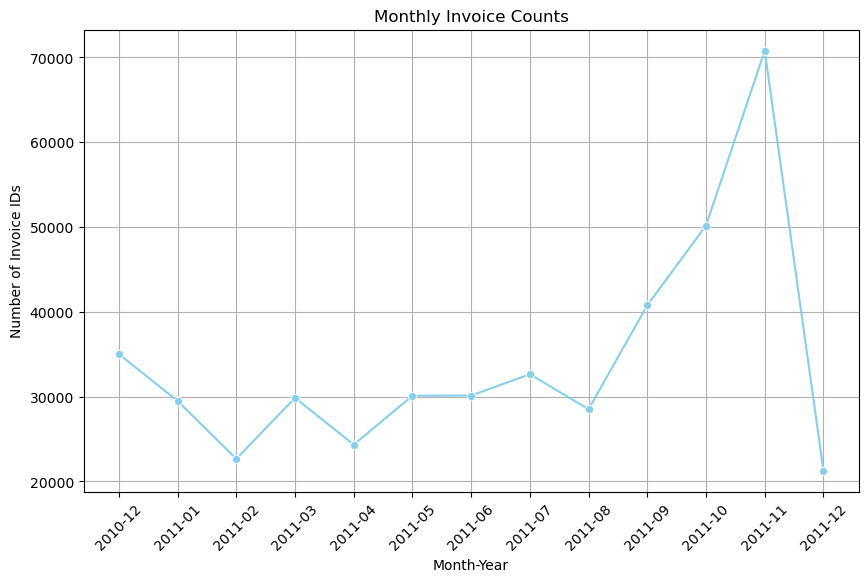

In [230]:
# Extract month and year from 'InvoiceDate'
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Count the number of invoice IDs in each month
monthly_counts = df['MonthYear'].value_counts().sort_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='skyblue')
plt.title('Monthly Invoice Counts')
plt.xlabel('Month-Year')
plt.ylabel('Number of Invoice IDs')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Geographical Analysis:

We will get the Top 5 Countries with the Highest Number of Orders

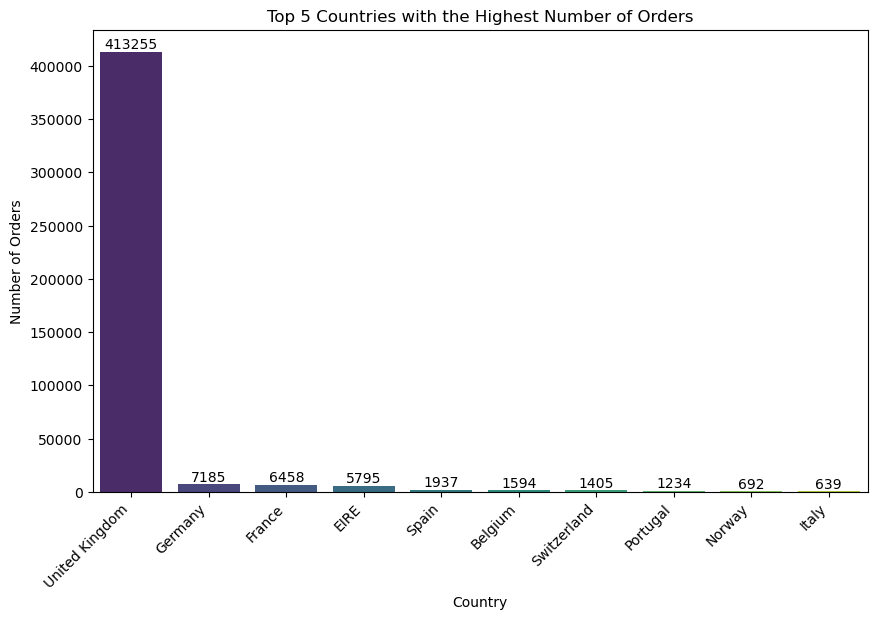

In [147]:
orders_by_country = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_country.index, y=orders_by_country.values, palette='viridis')
plt.title('Top 5 Countries with the Highest Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
for index, value in enumerate(orders_by_country.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [148]:
country_name=orders_by_country.index[0]
highest_country =orders_by_country.iloc[0]
print(f"{country_name} is the country with most orders placed with {highest_country} orders")

United Kingdom is the country with most orders placed with 413255 orders


In [149]:
avg_order_value_by_country = df.groupby('Country')['Total'].mean()

In [150]:
avg_order_value_by_country

Country
Australia               19.460943
Austria                 18.280093
Bahrain                 21.830000
Belgium                 16.732905
Brazil                  22.758261
Canada                  16.401887
Channel Islands         20.395939
Cyprus                  15.039053
Czech Republic          29.471429
Denmark                 24.963981
EIRE                    17.827524
European Community      19.754255
Finland                 20.148244
France                  16.646762
Germany                 17.253692
Greece                  26.316942
Hong Kong               23.479133
Iceland                 20.331702
Israel                  18.706032
Italy                   18.336745
Japan                    7.434174
Lebanon                 29.818889
Lithuania               42.795833
Malta                   14.019381
Netherlands             23.890208
Norway                  22.128902
Poland                  17.449139
Portugal                15.459028
RSA                     16.036471
Saudi 

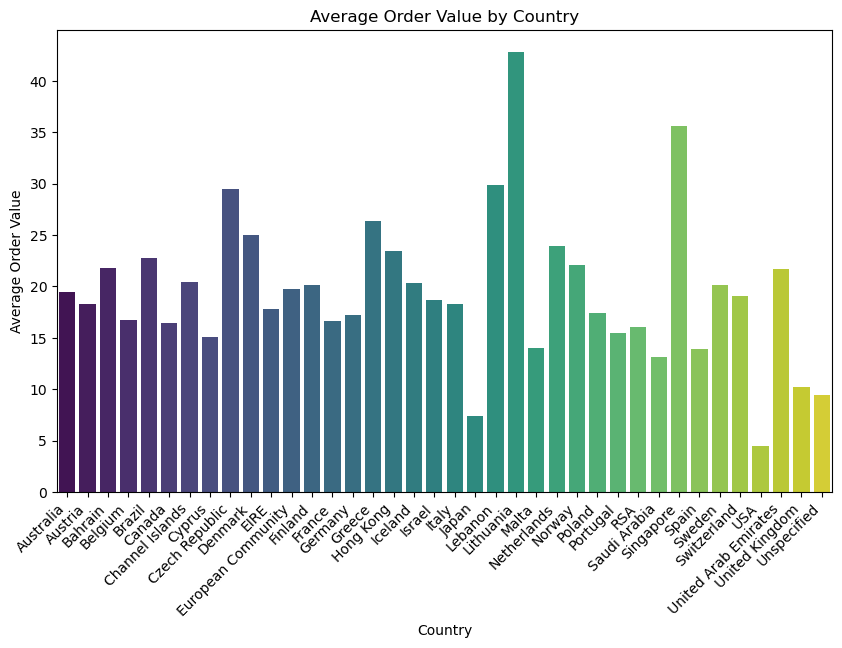

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_order_value_by_country.index, y=avg_order_value_by_country.values, palette='viridis')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.show()

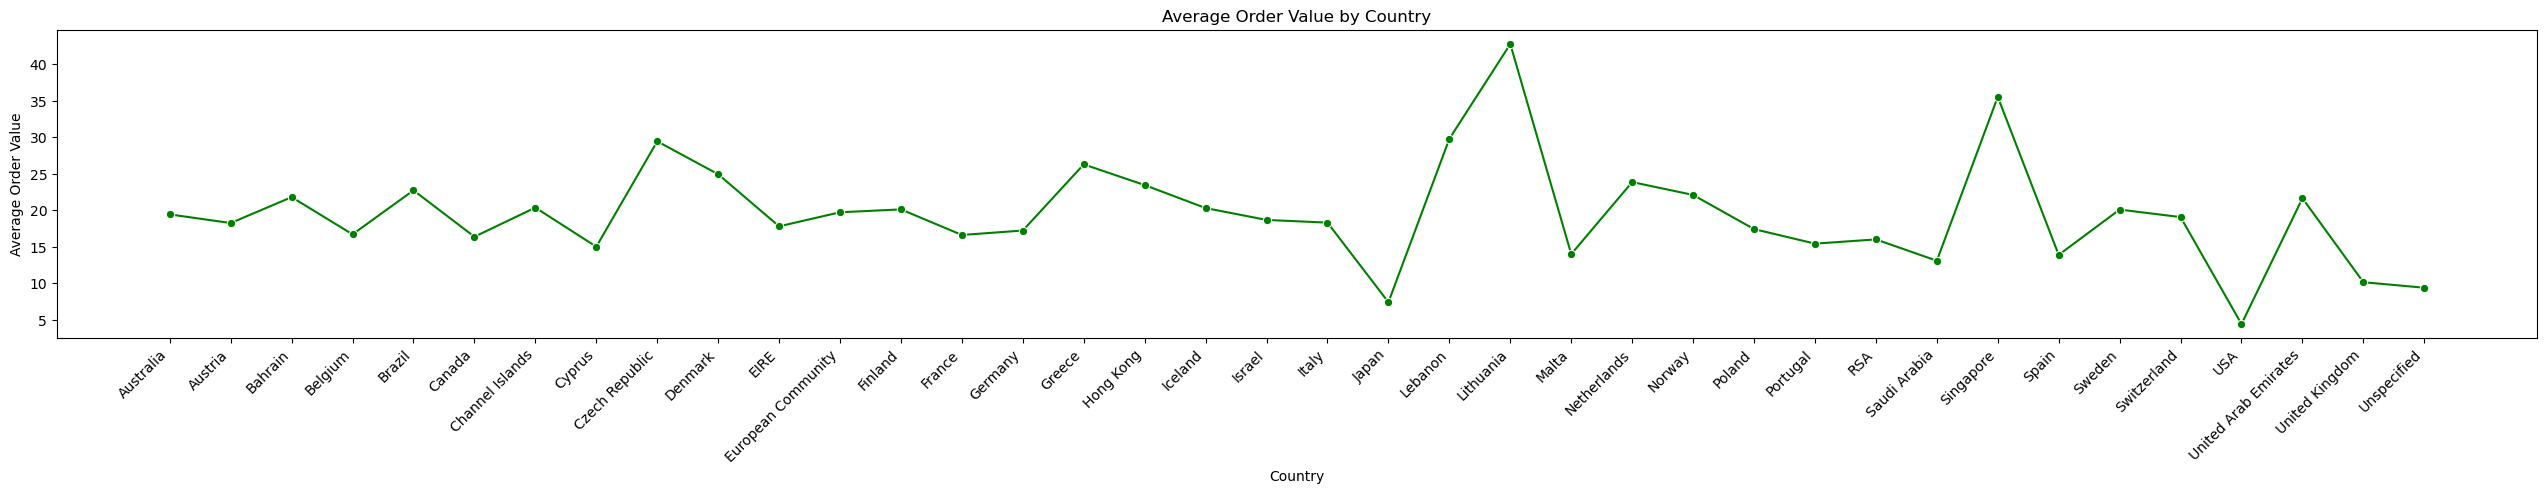

In [231]:
avg_value = df.groupby('Country')['Total'].mean()

plt.figure(figsize=(32, 4))
sns.lineplot(x=avg_value.index, y=avg_value.values, marker='o', color='green')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')


plt.show()

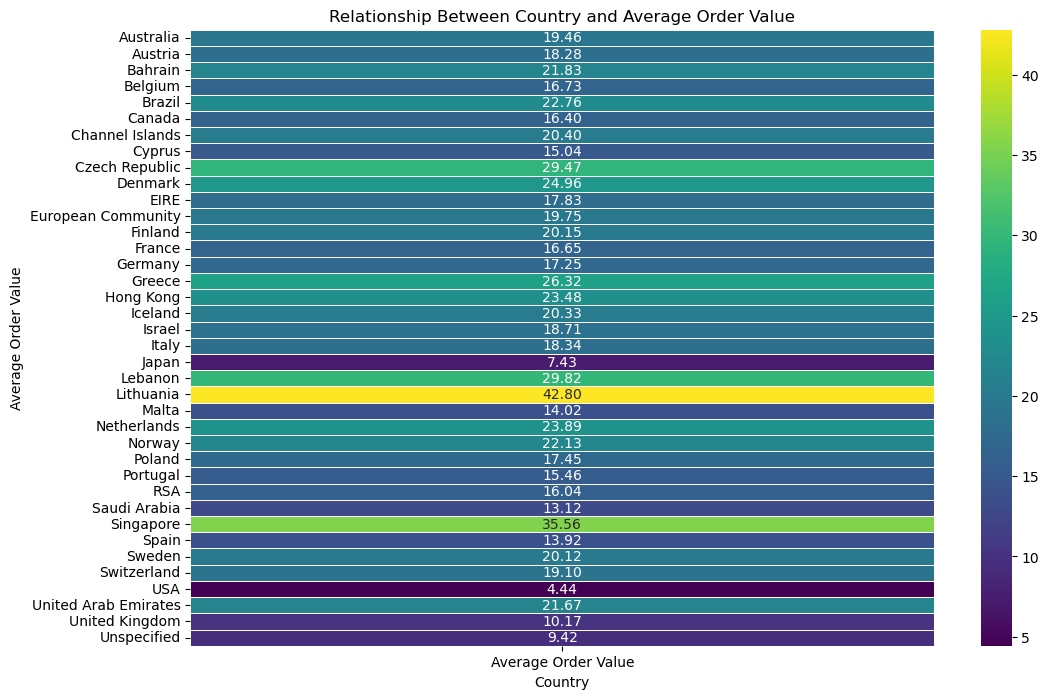

In [152]:
plt.figure(figsize=(12, 8))
heatmap_data = pd.DataFrame({'Average Order Value': avg_order_value_by_country.values}, index=avg_order_value_by_country.index)
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='viridis', linewidths=.5)
plt.title('Relationship Between Country and Average Order Value')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.show()

In [153]:
avg_order_value_by_country=avg_order_value_by_country.sort_values(ascending=False)

In [154]:
country_name_2=avg_order_value_by_country.index[0]
highest_country_2 =avg_order_value_by_country.iloc[0]
print(f"{country_name_2} is the country with the highest value per order with ${highest_country_2:.2f}")

Lithuania is the country with the highest value per order with $42.80


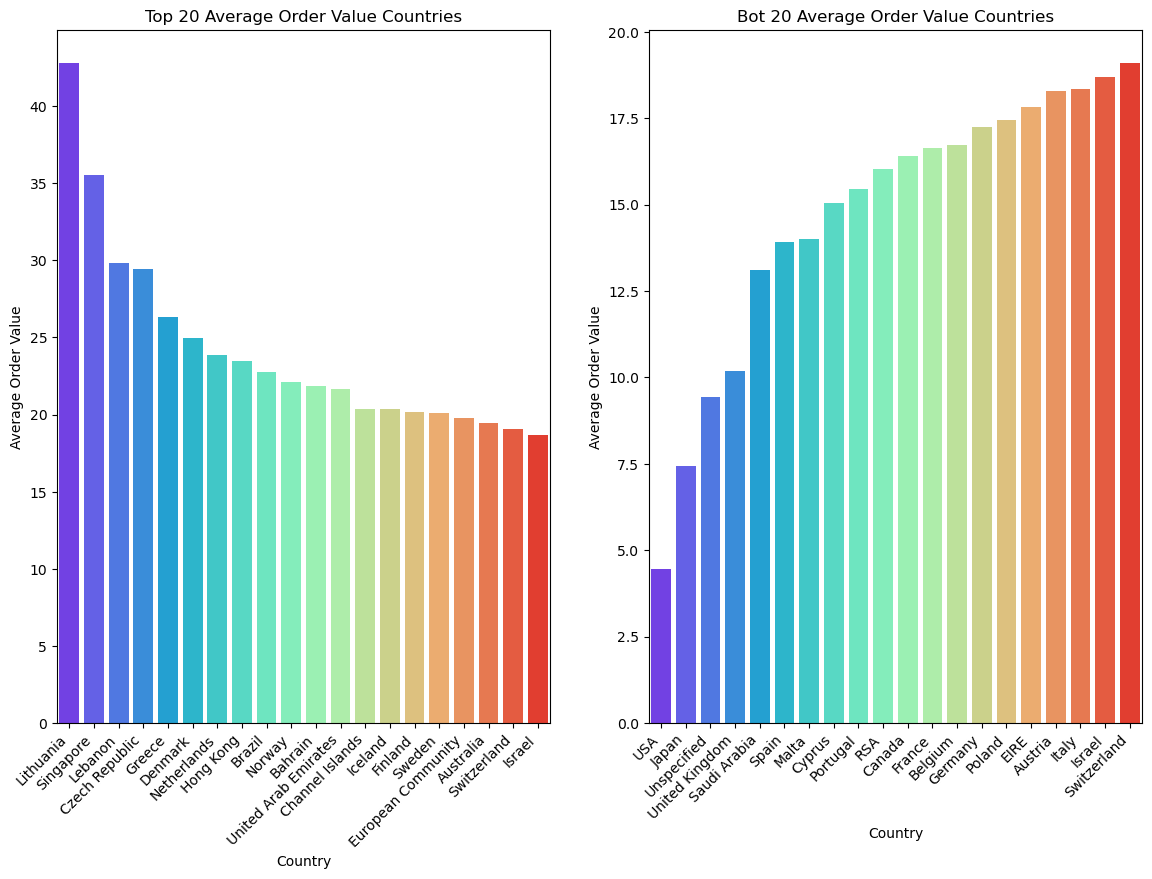

In [232]:
top20_sale = df.groupby('Country')['Total'].mean().sort_values(ascending = False).head(20)
bot20_sale = df.groupby('Country')['Total'].mean().sort_values(ascending = True).head(20)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for top 10 population countries
sns.barplot(x=top20_sale.index, y=top20_sale.values, palette='rainbow', ax=axes[0])
axes[0].set_title('Top 20 Average Order Value Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Average Order Value')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot for bottom 10 population countries
sns.barplot(x=bot20_sale.index, y=bot20_sale.values, palette='rainbow', ax=axes[1])
axes[1].set_title('Bot 20 Average Order Value Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average Order Value')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.show()

## Customer Behavior:

We will check on average how long do customers remain active (between their first and last purchase)

In [155]:
customer_activity= df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_activity['Customer_activity'] = (customer_activity['max'] - customer_activity['min']).dt.days

# Calculate the average customer lifespan
average_customer_activity = customer_activity['Customer_activity'] .mean()

print(f'On average customers remain active (between their first and last purchase): {average_customer_activity:.2f} days')

On average customers remain active (between their first and last purchase): 130.46 days


The customer segments based on their purchase behavior was already discussed in the RFM section

## Returns and Refunds:

We want to analyze how many purchases were returns so we will consider the ones that have 'Quantity'< 0 and the word refund or return in the Description

In [228]:
negative_values_count = (df['Quantity'] < 0).sum()
negative_values_count

7149

In [229]:
filtered_rows = df[df['Description'].str.contains('refund|return', case=False, na=False)]
filtered_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,DayOfWeek,Hour,Month_Name,PaymentMethod
137032,550951,84531A,returned,2,2011-04-21 16:15:00,0.0,10000.0,United Kingdom,0.0,Thursday,16,April,Gift Card
137033,550952,84531B,returned,2,2011-04-21 16:16:00,0.0,10000.0,United Kingdom,0.0,Thursday,16,April,Gift Card


Based on that we can calculate the Percentage of orders with returns or refunds

In [187]:
percent_re = (negative_values_count + len(filtered_rows)) / len(df)
print(f"Percentage of orders with returns or refunds: {percent_re:.3f}%")

Percentage of orders with returns or refunds: 0.016%


In [188]:
return_order = df[df['Quantity'] < 0]
return_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,DayOfWeek,Hour,Month_Name
118,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,Wednesday,9,December
164,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,Wednesday,10,December
165,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40,Wednesday,10,December
166,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,Wednesday,10,December
757,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50,Wednesday,12,December


In [190]:
return_product_count = return_order.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)*-1
return_product_count

Description
JAM MAKING SET WITH JARS             247
STRAWBERRY CERAMIC TRINKET BOX       156
SILVER HANGING T-LIGHT HOLDER        150
LUNCH BAG RED RETROSPOT              124
Manual                               122
SWEETHEART CERAMIC TRINKET BOX       120
check                                118
SET OF 3 CAKE TINS PANTRY DESIGN     117
JUMBO BAG RED RETROSPOT              117
RETRO PLASTIC ELEPHANT TRAY          110
Name: Quantity, dtype: int64

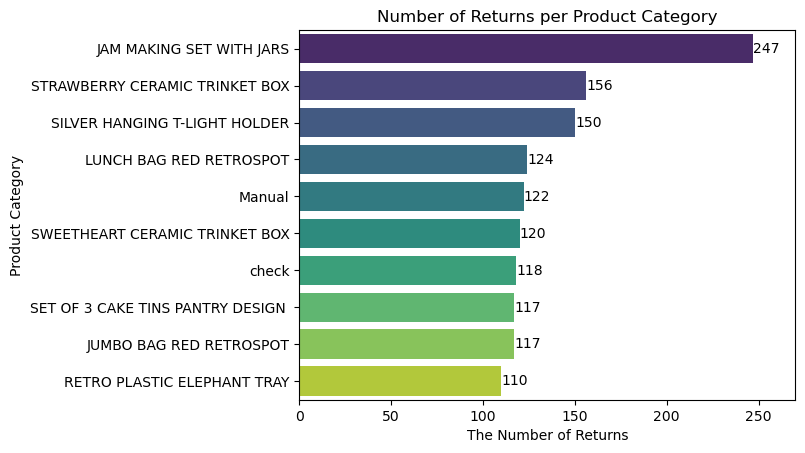

In [203]:
ax = sns.barplot(x=return_product_count.values, y=return_product_count.index, palette='viridis')

ax.bar_label(ax.containers[0], fontsize=10)

ax.set_xlabel('The Number of Returns')
ax.set_ylabel('Product Category')
plt.title('Number of Returns per Product Category')
plt.xlim(0,270)

plt.show()


In [204]:
product_name=return_product_count.index[0]
highest_product =return_product_count.iloc[0]
print(f"{product_name} is the product with the highest number of returns with {highest_product:.2f}")

JAM MAKING SET WITH JARS is the product with the highest number of returns with 247.00


# Payment method

We do not have the information about the payment method but we know that 'Credit Cards', 'Paypal', 'Gift Card', 'Mobile Payment', 'E-check' are the most famous so we will use those to randomly assign values for each purchase.

In [226]:
payment_method = ['Credit Cards', 'Paypal', 'Gift Card', 'Mobile Payment', 'E-check']

np.random.seed(42)

df['PaymentMethod'] = np.random.choice(payment_method, size=len(df))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,DayOfWeek,Hour,Month_Name,PaymentMethod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,8,December,Mobile Payment
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,E-check
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,8,December,Gift Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,E-check
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,8,December,E-check


In [227]:
most_common = df['PaymentMethod'].value_counts().index[0]

print("Most common payment methods:", most_common)

Most common payment methods: E-check


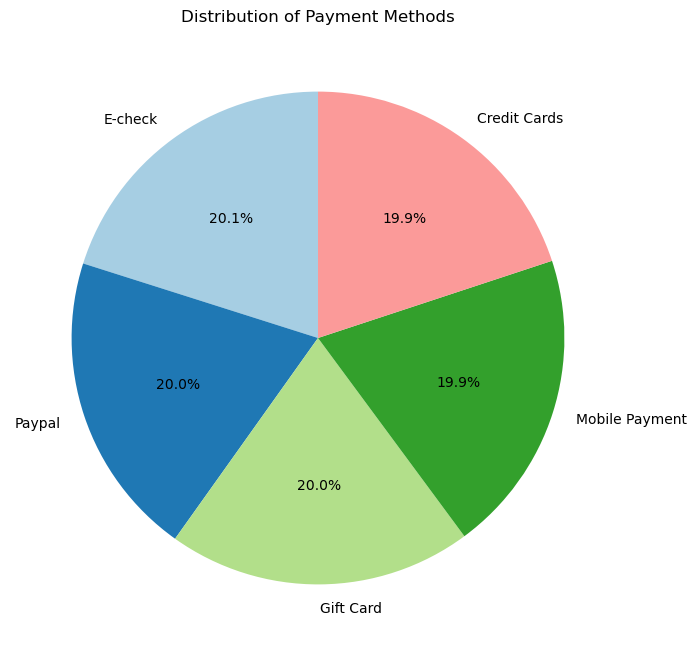

In [225]:
payment_method_counts = df['PaymentMethod'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Payment Methods')
plt.show()